In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence  #단어수 맞추기
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 1s 1us/step


In [4]:
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [6]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [7]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20,
                   validation_data=(X_test, y_test))

C:\Users\pc\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 7s 738us/step - loss: 2.5409 - accuracy: 0.3742 - val_loss: 2.0279 - val_accuracy: 0.4982
Epoch 2/20
8982/8982 [==============================] - 6s 650us/step - loss: 1.8996 - accuracy: 0.5065 - val_loss: 1.8488 - val_accuracy: 0.5169
Epoch 3/20
8982/8982 [==============================] - 6s 655us/step - loss: 1.7733 - accuracy: 0.5323 - val_loss: 1.7914 - val_accuracy: 0.5307
Epoch 4/20
8982/8982 [==============================] - 6s 653us/step - loss: 1.6863 - accuracy: 0.5595 - val_loss: 1.6692 - val_accuracy: 0.5828
Epoch 5/20
8982/8982 [==============================] - 6s 651us/step - loss: 1.5825 - accuracy: 0.5932 - val_loss: 1.6038 - val_accuracy: 0.6037
Epoch 6/20
8982/8982 [==============================] - 6s 655us/step - loss: 1.4756 - accuracy: 0.6183 - val_loss: 1.5290 - val_accuracy: 0.6113
Epoch 7/20
8982/8982 [==============================] - 6s 650us/step - loss

In [9]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

2246/2246 [==============================] - 1s 431us/step

 Test Accuracy: 0.7088


In [10]:
y_vloss = history.history['val_loss'] #테스트셋 오차
y_loss = history.history['loss'] #학습셋오차

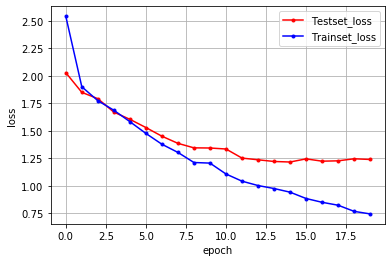

In [12]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.',c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()